# Panelling

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

## Drawing panels

Panels are obtained by using the [subplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html) method, which returns an axe object.

<div class="alert alert-info">
    <strong>Remark</strong> The <i>plt.gca()</i> method is identical to <i>plt.subplot(1, 1, 1)</i>
</div>

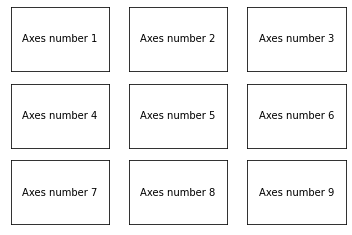

In [2]:
fig = plt.figure()
for p in range(1, 3*3+1):
    ax = plt.subplot(3, 3, p)  # number of rows, number of columns, subplot index (starts at 1!)
    plt.text(0.5, 0.5, 'Axes number '+str(p), ha='center', va='center')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Setting panel properties

The [subplots_adjust](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) method allows to control some panelling properties (horizontal and vertical spacing, margins, etc.).

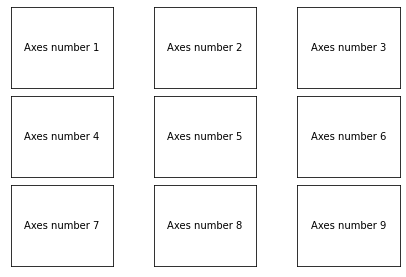

In [3]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.4, hspace=0.1,
                    left = 0.05, right=0.95,
                    bottom=0.05, top=0.95)
for p in range(1, 3*3+1):
    ax = plt.subplot(3, 3, p)
    plt.text(0.5, 0.5, 'Axes number '+str(p), ha='center', va='center')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Managing properties

It is possible to store the outcomes of the `subplot` method into a list, to manage some axis properties *a posteriori*

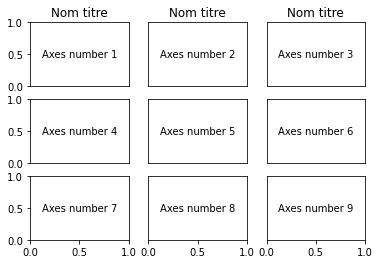

In [4]:
fig = plt.figure()

listax = []
for p in range(1, 3*3+1):
    ax = plt.subplot(3, 3, p)
    listax.append(ax)
    plt.text(0.5, 0.5, 'Axes number '+str(p), ha='center', va='center')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
for ax in [listax[6], listax[7], listax[8]]:
    ax.get_xaxis().set_visible(True)
    
for ax in [listax[0], listax[3], listax[6]]:
    ax.get_yaxis().set_visible(True)
    
for ax in [listax[0], listax[1], listax[2]]:
    ax.set_title('Nom titre')

plt.show()

## Defining panel grid

To define grid panels, use the [subplot2grid](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot2grid.html) medhod.

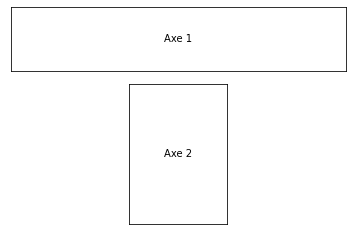

In [5]:
fig = plt.figure()
# size of the subplot: 3 by 3
# location of the plot: 0(top), 0(left), spans 3 columns (spans 1 row, default)
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.text(0.5, 0.5, 'Axe 1', ha='center', va='center')

ax2 = plt.subplot2grid((3, 3), (1, 1), rowspan=2)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
plt.text(0.5, 0.5, 'Axe 2', ha='center', va='center')

plt.show()

## Manual position of subplots

The [axes](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axes.html) method allows to create axes by providing its position relative to figure coordinates.

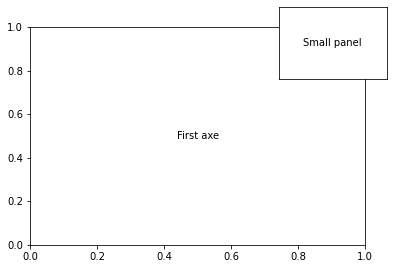

In [6]:
fig = plt.figure()
ax = plt.gca() # add a first axes 
ax.text(0.5, 0.5,'First axe', ha='center', va='center')
ax = plt.axes([0.7, 0.7, 0.25, 0.25])
plt.text(0.5, 0.5, 'Small panel', ha='center', va='center')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

This can be usefull for instance to **manually position colorbars**.

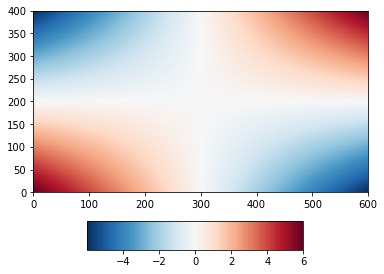

In [7]:
import numpy as np

delta = 0.01
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
xx, yy = np.meshgrid(x, y)
zz = xx * yy

plt.figure()
plt.subplots_adjust(bottom=0.25)
cs = plt.pcolormesh(zz)
cax = plt.axes([0.25, 0.05, 0.5, 0.1])  # define the position of the colorbar
plt.colorbar(cs, cax, orientation='horizontal')
plt.show()

## Displaying plots on identical axes

For aligning several plots, the `ImageGrid` function can be used. For contour plots with individual colorbars:

0 Axes(0.125,0.125;0.775x0.755)
1 Axes(0.125,0.125;0.775x0.755)
2 Axes(0.125,0.125;0.775x0.755)
3 Axes(0.125,0.125;0.775x0.755)


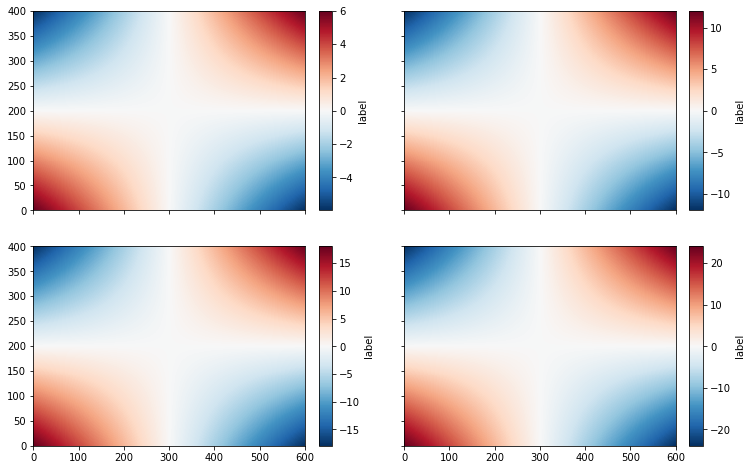

In [8]:
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid

fig = plt.figure(figsize=(12, 8))
axgr = ImageGrid(fig, 111,  nrows_ncols=(2, 2), 
                 label_mode='L', aspect=False, share_all=True, axes_pad=[1, 0.5],
                 cbar_mode='each', cbar_size="5%", cbar_pad='5%')

# recover the list of cbar axes
cbar_axes = axgr.cbar_axes

# Loop over all the axes within the image grid
for i, ax in enumerate(axgr):
    print(i, ax)
    cs = ax.pcolormesh(zz * (i + 1))
    cb = cbar_axes[i].colorbar(cs)
    cb.set_label('label')

Note that `xticklabels` appear only on the bottom panels, while `yticklabels` only appear on the left panels.

For plots with a single colorbar, set `cbar_mode=single`

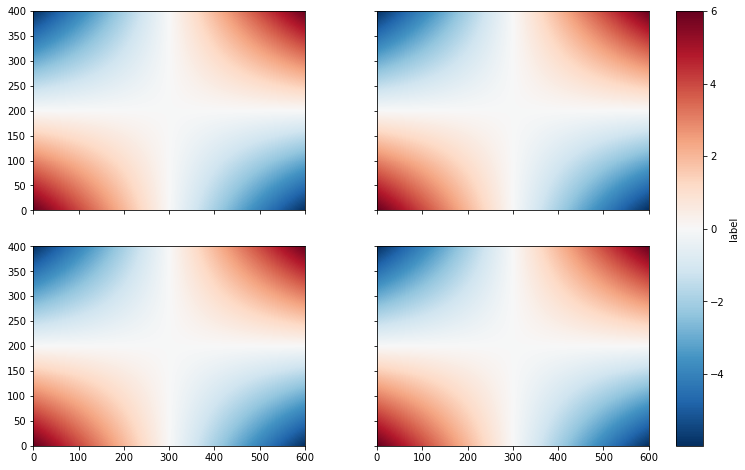

In [9]:
fig = plt.figure(figsize=(12, 8))
axgr = ImageGrid(fig, 111,  nrows_ncols=(2, 2), 
                 label_mode='L', aspect=False, share_all=True, axes_pad=[1, 0.5],
                 cbar_mode='single', cbar_size="5%", cbar_pad='5%')

# recover the list of cbar axes
cbar_axes = axgr.cbar_axes

# Loop over all the axes within the image grid
for i, ax in enumerate(axgr):
    cs = ax.pcolormesh(zz)
    cb = cbar_axes[i].colorbar(cs)
    cb.set_label('label')

Same thing for time series:

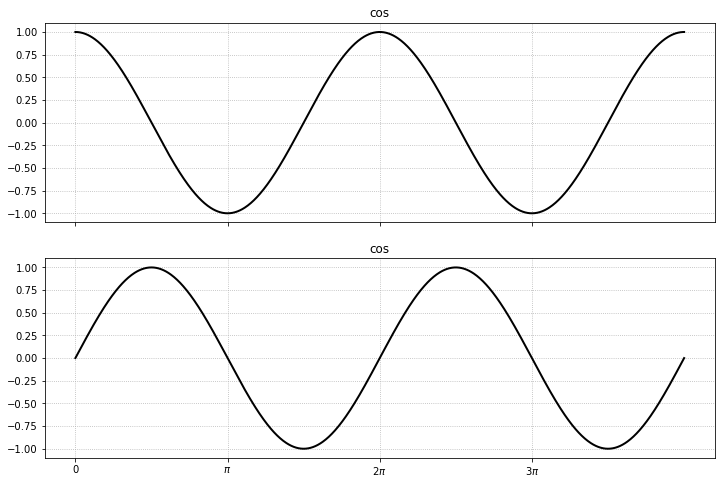

In [10]:
fig = plt.figure(figsize=(12, 8))
axgr = ImageGrid(fig, 111,  nrows_ncols=(2, 1), 
                 label_mode='L', aspect=False, share_all=True, axes_pad=[1, 0.5])

x = np.linspace(0, 4*np.pi, 1000)
y0 = np.cos(x)
y1 = np.sin(x)
y = [y0, y1]
label = ['cos', 'sin']

# Loop over all the axes within the image grid
for i, ax in enumerate(axgr):
    cs = ax.plot(x, y[i])
    ax.set_title(label[0])
    ax.set_xticks(np.arange(0, 4*np.pi, np.pi))
    ax.set_xticklabels(['0', r'$\pi$', r'$2\pi$', r'$3\pi$', ])
    ax.grid(True)